### Pair IV
# Asunciones

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import random 

# Librerías para la visualización de los datos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Spectral")

# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene

# Para visualizar todas las columnas 
# -----------------------------------------------------------------------
pd.options.display.max_columns = None 

# Para la gestión de los warning
# ======================
import warnings
warnings.filterwarnings('ignore')

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.
El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:
* Normalidad (ya la deberíais haber evaluado)
* Homogeneidad de varianzas
* Independencia de las variables
Cada asunción la deberéis testar de forma visual y analítica.

In [2]:
df = pd.read_pickle("../data/cost_of_living_pair1_limpio.pkl")
df.head(2)

,ciudad,pais,continente,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo
0,Delhi,India,Asia,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96
1,Shanghai,China,Asia,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01


    - Normalidad

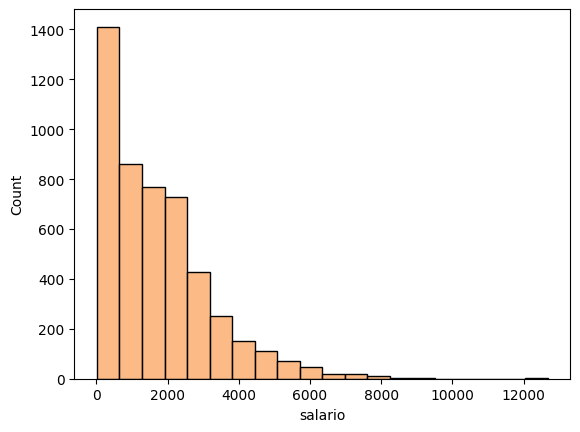

In [3]:
sns.histplot(x = df["salario"],  bins=20, color= qualitative_colors[1]);

In [4]:
stats.shapiro(df["salario"])

ShapiroResult(statistic=0.8780022859573364, pvalue=0.0)

Nuestro p-valor es menor de 0.05 por lo que  podemos rechazar la hipótesis nula, es decir, nuestros datos no siguen una distribución normal.

    - Homogeneidad de las varianzas de las variables numéricas

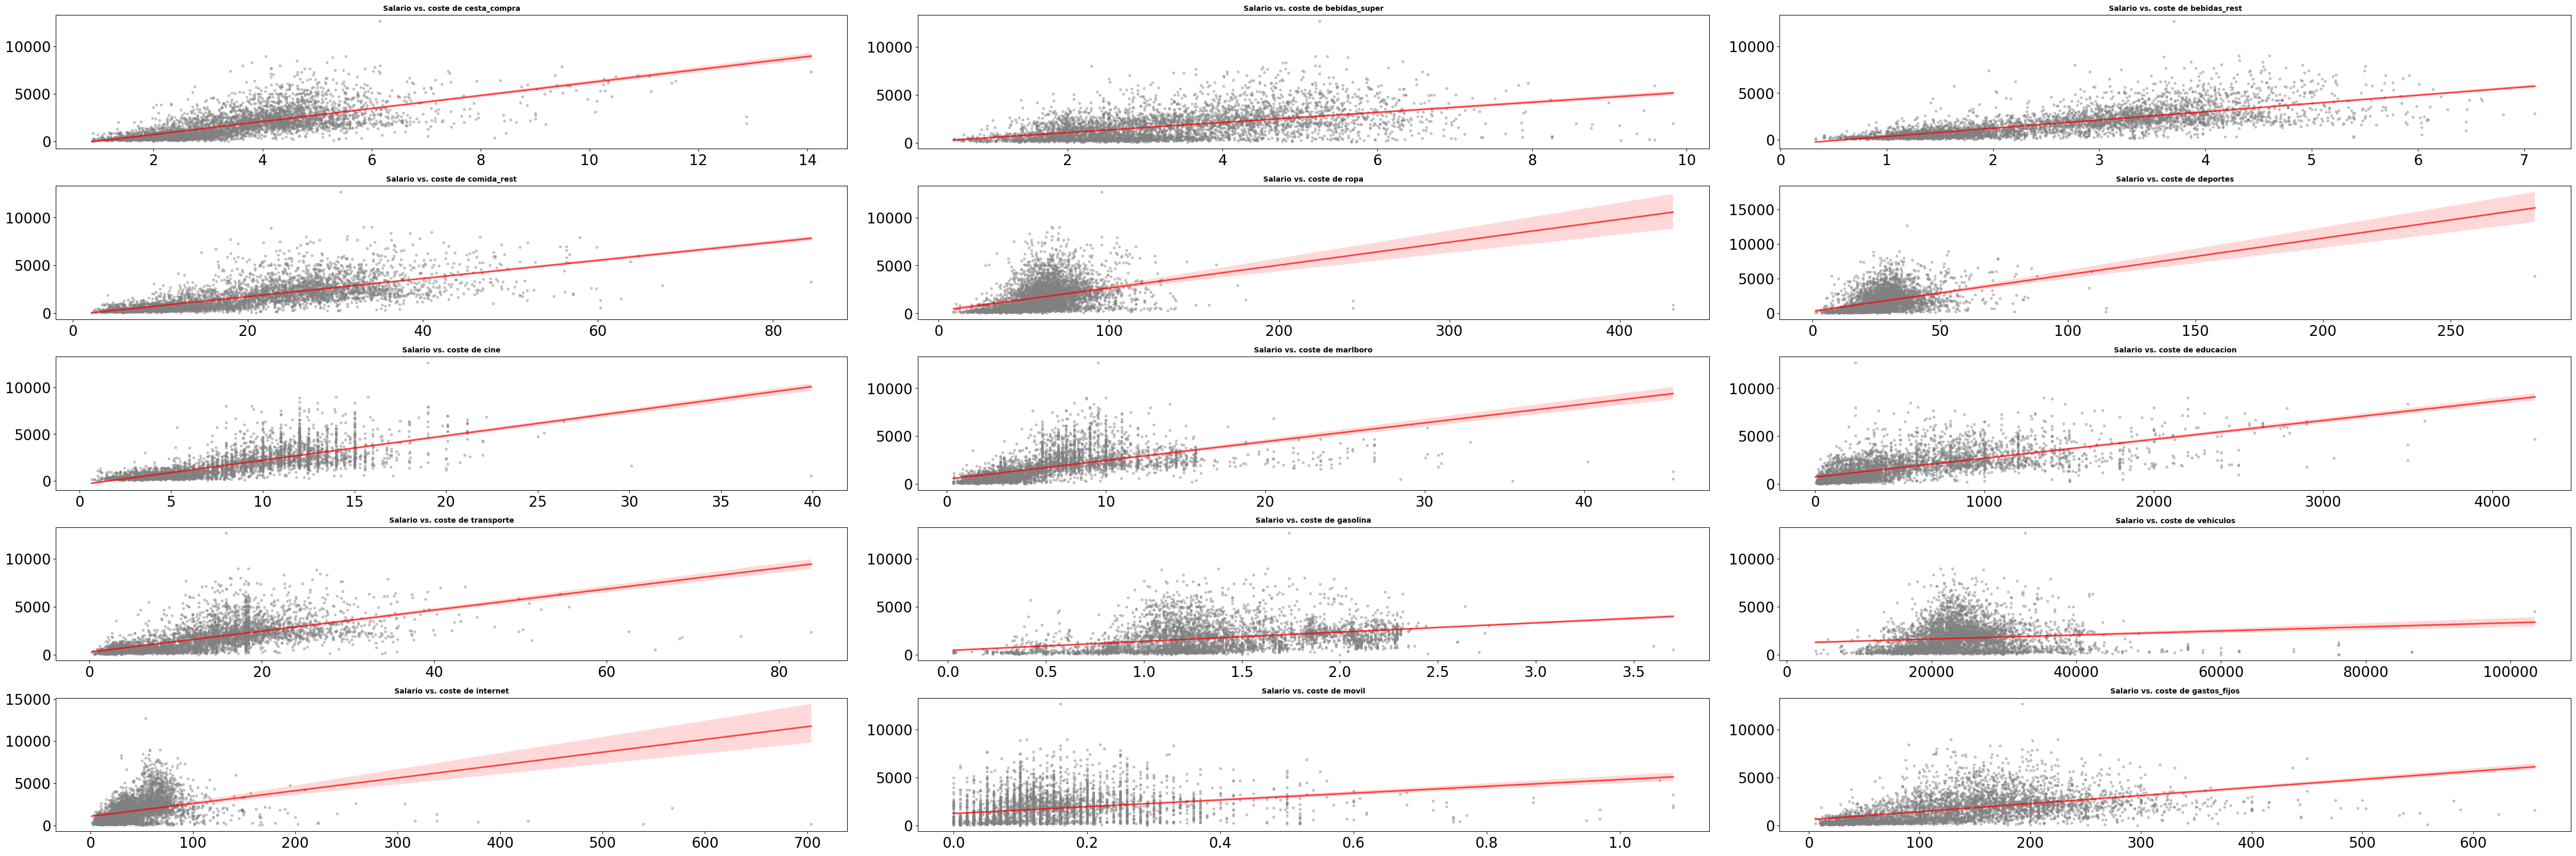

In [5]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (50, 20))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("salario")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["salario"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Salario vs. coste de {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3])
plt.savefig("../graficas/04_asuncion_regplots_num.png");

    - Homogeneidad de las varianzas de la variable categórica 'continente'

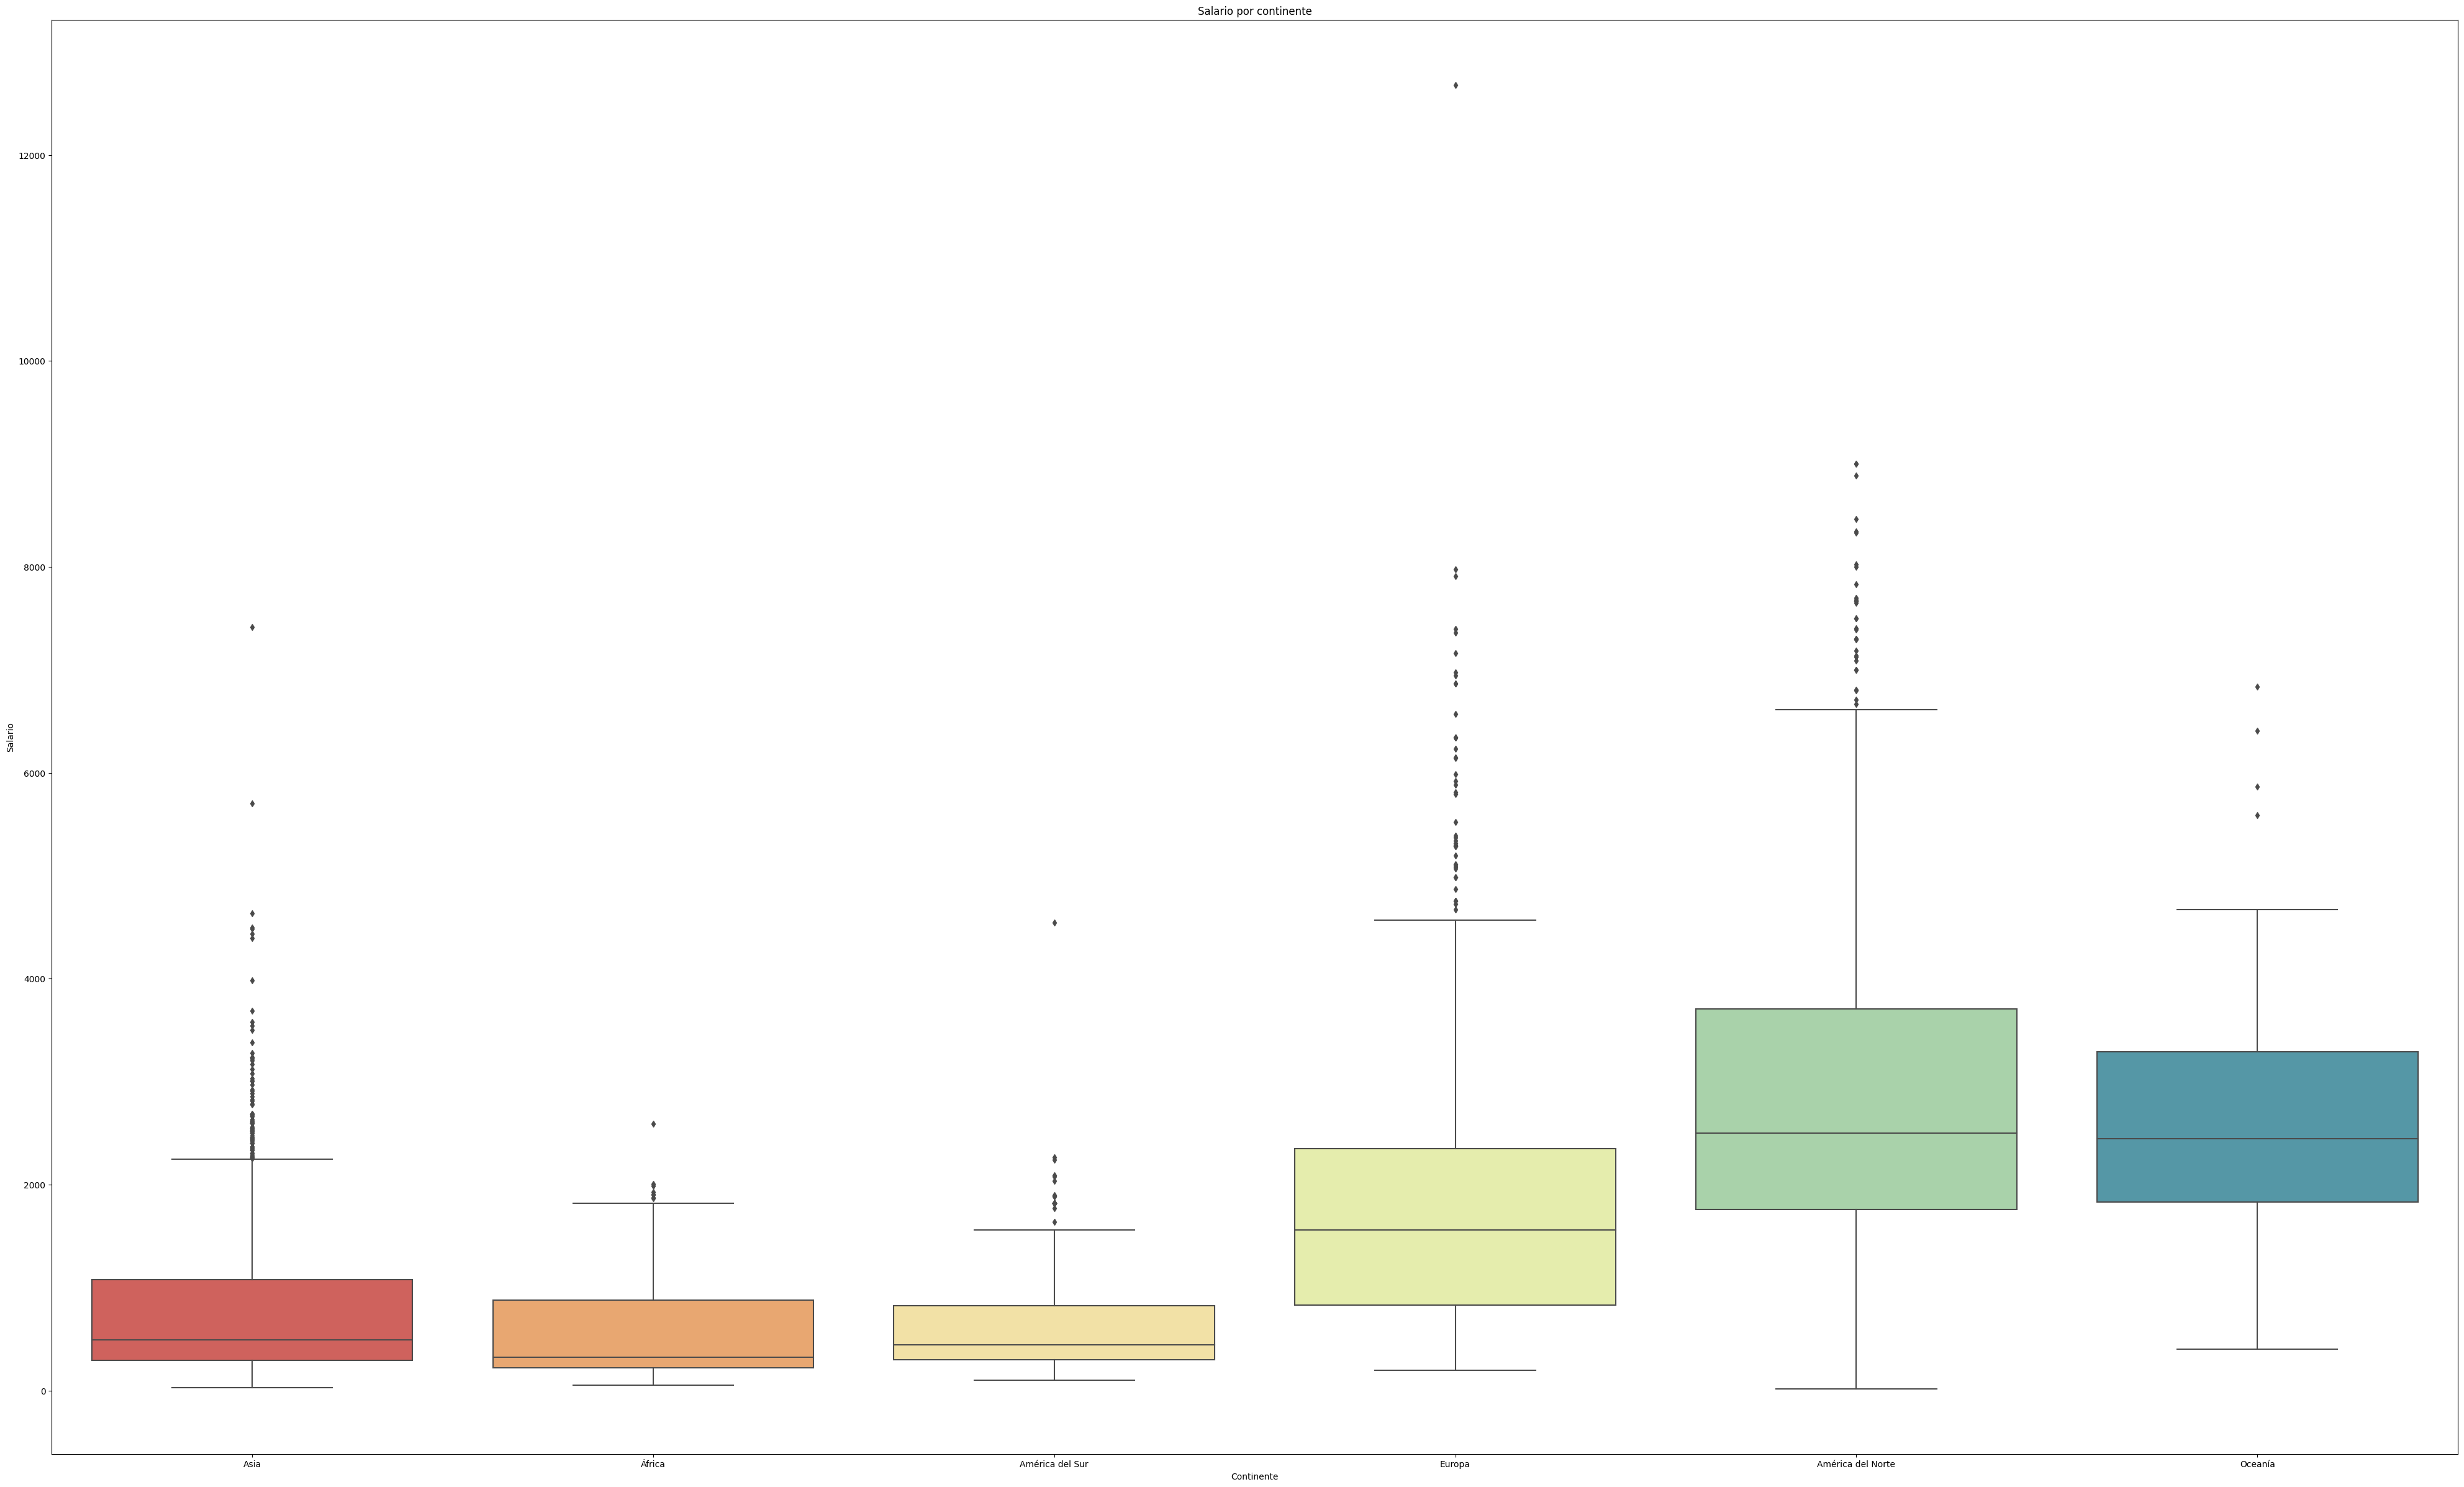

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50, 30))

sns.boxplot(
    x       = 'continente',
    y       = 'salario',
    data    = df,
    palette = qualitative_colors,
    ax      = ax
)
ax.set_title('Salario por continente')
ax.set_ylabel('Salario')
ax.set_xlabel('Continente')
plt.savefig("../graficas/04_asuncion_boxplot_cat.png");

    - Independencia de las variables 

In [9]:
crosstab, test_results, expected = rp.crosstab(df["continente"], df["salario"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [10]:
crosstab.head()

salario                                                  \
salario              18.0  20.0  25.0  30.0 35.75  36.6  40.0 41.25 46.33   
continente                                                                  
América del Norte    0.02  0.02  0.02  0.00  0.02  0.00  0.02  0.00  0.00   
América del Sur      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Asia                 0.00  0.00  0.00  0.02  0.00  0.02  0.00  0.02  0.02   
Europa               0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
Oceanía              0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

                                                                               \
salario            50.0 50.24 50.69 54.08 66.88  72.8 74.91  76.5 81.34 81.46   
continente                                                                      
América del Norte  0.00  0.00   0.0   0.0   0.0  0.00  0.00  0.00  0.00   0.0   
América del Sur    0.00  0.00   0.0   0.0   0.0  0.00  0.00  0.00  0.00   0.0   
Asia               0.02  0.02   0.0   0.0   0.0  0.02  0.02  0.02  0.02   0.0   
Europa             0.00  0.00   0.0   0.0   0.0  0.00  0.00  0.00  0.00   0.0   
Oceanía            0.00  0.00   0.0   0.0   0.0  0.00  0.00  0.00  0.00   0.0   

                                                                         \
salario           82.15 84.48  89.1 90.12 93.63 95.37  97.3 99.73 100.0   
continente                                                                
América del Norte   0.0   0.0  0.00   0.0  0.00   0.0  0.00   0.0  0.00   
América del Sur     0.0   0.0  0.00   0.0  0.00   0.0  0.00   0.0  0.02   
Asia                0.0   0.0  0.02   0.0  0.02   0.0  0.02   0.0  0.00   
Europa              0.0   0.0  0.00   0.0  0.00   0.0  0.00   0.0  0.00   
Oceanía             0.0   0.0  0.00   0.0  0.00   0.0  0.00   0.0  0.00   

                                                                          \
salario           100.24 101.82 103.03 105.81 106.08 106.6 108.45 108.61   
continente                                                                 
América del Norte   0.00    0.0   0.00   0.00   0.00  0.00   0.00    0.0   
América del Sur     0.00    0.0   0.00   0.00   0.00  0.00   0.00    0.0   
Asia                0.02    0.0   0.02   0.02   0.02  0.02   0.02    0.0   
Europa              0.00    0.0   0.00   0.00   0.00  0.00   0.00    0.0   
Oceanía             0.00    0.0   0.00   0.00   0.00  0.00   0.00    0.0   

                                                                           \
salario           109.58 109.78 111.38 112.0 112.65 113.29 115.54 116.554   
continente                                                                  
América del Norte    0.0   0.00   0.00   0.0    0.0   0.00   0.00    0.00   
América del Sur      0.0   0.00   0.00   0.0    0.0   0.00   0.00    0.00   
Asia                 0.0   0.02   0.02   0.0    0.0   0.02   0.02    0.02   
Europa               0.0   0.00   0.00   0.0    0.0   0.00   0.00    0.00   
Oceanía              0.0   0.00   0.00   0.0    0.0   0.00   0.00    0.00   

                                                                              \
salario           119.40800000000002 120.16 120.75999999999999 122.01 122.18   
continente                                                                     
América del Norte               0.00    0.0               0.02   0.00    0.0   
América del Sur                 0.00    0.0               0.00   0.00    0.0   
Asia                            0.02    0.0               0.00   0.02    0.0   
Europa                          0.00    0.0               0.00   0.00    0.0   
Oceanía                         0.00    0.0               0.00   0.00    0.0   

                                                                         \
salario           122.52 123.91 125.32 126.62400000000002 127.13 128.09   
continente                                                                
América del Norte   0.00    0.0   0.00               0.00  

In [11]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 19580.0) =,23081.1779
1,p-value =,0.0000
2,Cramer's V =,0.9732


In [12]:
numericas = df.select_dtypes(include = np.number)
numericas.head(2)

,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo
0,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96
1,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01


In [13]:
resultados = {}

numericas_col = df.select_dtypes(include = np.number).drop(["salario"], axis = 1).columns

for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.salario, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val


In [14]:
resultados

{'cesta_compra': 0.0,
 'bebidas_super': 0.0,
 'bebidas_rest': 0.0,
 'comida_rest': 0.0,
 'ropa': 0.0,
 'deportes': 0.0,
 'cine': 0.0,
 'marlboro': 0.0,
 'educacion': 0.0,
 'transporte': 0.0,
 'gasolina': 0.0,
 'vehiculos': 0.0,
 'internet': 0.0,
 'movil': 0.0,
 'gastos_fijos': 0.0,
 'alquiler': 6.874008822131958e-294,
 'm2': 1.5223770960536807e-20,
 'inte_fij_hipo': 0.0}

In [15]:
numericas = df.select_dtypes(include = np.number)
numericas.head(2)

,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo
0,586.35,1.602857,3.5475,1.592,10.406667,37.7500,14.77,4.90,4.28,73.76,2.834,1.25,17607.475,7.96,0.01,57.37,319.8075,1844.180,7.96
1,1382.83,3.862857,4.3575,2.022,17.230000,77.7925,38.95,8.38,3.49,1356.63,7.880,1.17,19957.900,16.74,0.03,64.76,1537.2925,13253.985,5.01


In [16]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df.select_dtypes(include = np.number).drop("salario", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.salario, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val


In [17]:
resultados

{'cesta_compra': 0.0,
 'bebidas_super': 0.0,
 'bebidas_rest': 0.0,
 'comida_rest': 0.0,
 'ropa': 0.0,
 'deportes': 0.0,
 'cine': 0.0,
 'marlboro': 0.0,
 'educacion': 0.0,
 'transporte': 0.0,
 'gasolina': 0.0,
 'vehiculos': 0.0,
 'internet': 0.0,
 'movil': 0.0,
 'gastos_fijos': 0.0,
 'alquiler': 6.874008822131958e-294,
 'm2': 1.5223770960536807e-20,
 'inte_fij_hipo': 0.0}